### Taylor Diagrams for HPD and for HPD-Clim

In [3]:
import pandas as pd
import numpy as NP
%matplotlib inline
%config InlineBackend.figure_format = 'jpg'
%config InlineBackend.print_figure_kwargs = {'dpi':600}
import matplotlib.pyplot as PLT

In [2]:
# =========================================
# For accessing directories
# =========================================
root_dir = "/data/artemis/workspace/vbennington/LDEO_HPD/models/XGB/GCB_2021"  # directory output will be written to  
recon_output_dir = f"{root_dir}/reconstructions" # reconstructions saved here

# Set these:
run_dir = '/data/artemis/workspace/vbennington/SOCAT_ML/pCO2_DIC'
approach = 'xg'
tdir = f"{run_dir}/models/reconstructions/{approach}"

In [8]:
dm = pd.read_csv(f'{recon_output_dir}/Taylor_stats_pCO2_allmodels_1985-2020.csv') # uncorrected model output stats
dhpd = pd.read_csv(f'{recon_output_dir}/Taylor_stats_pCO2_ens_1985-2020.csv') # HPD and HPD-clim corrected for the three climatology periods
dprd = pd.read_csv(f"{tdir}/ens_pCO2_Taylor_stats_1985-2018.csv") # Includes data products (including updated CarboScope) 

In [24]:
dm.head(20) # Stats for uncorrected model output

,stats,cesm_sfco2_1x1_A,fesom2_sfco2_1x1_A,mpi_sfco2_1x1_A,cnrm_sfco2_1x1_A,ipsl_sfco2_1x1_A,planktom_sfco2_1x1_A,noresm_sfco2_1x1_A,princeton_sfco2_1x1_A
0,R_BATS,0.929565,0.939886,0.923171,0.908742,0.935126,0.937070,0.862586,0.933324
1,STD_BATS,39.952802,40.709577,46.125806,35.835002,35.386238,36.868450,28.139510,41.297353
2,RMSE_BATS,15.201039,15.931462,24.961138,19.873786,17.263100,13.435975,18.611279,15.160893
3,R_HOT,0.925989,0.924131,0.896702,0.886442,0.919742,0.919850,0.916067,0.924461
4,STD_HOT,20.082740,20.056567,24.928569,19.256582,20.496880,18.601017,22.451326,20.397445
5,RMSE_HOT,7.695605,7.841069,20.864546,15.733327,8.530190,19.713430,28.132643,12.930235
6,R_SOCCOM,0.397877,0.169151,0.231357,0.150604,0.220471,-0.057357,0.171748,0.377914
7,STD_SOCCOM,21.786211,28.366417,35.875386,19.762817,21.258006,21.440540,22.512306,27.017274
8,RMSE_SOCCOM,35.702975,43.697170,45.274858,39.385943,38.429844,44.112806,40.077380,38.434020
9,R_LDEO,0.611889,0.520822,0.533134,0.564289,0.598805,0.480677,0.548732,0.637786


In [10]:
dhpd.head(25) # Ensemble mean pCO2 for each clim correction and full HPD (AND OBSERVED STDs!!!)

,stats,HPD,observed,1998-2020,2000-2020,1982-2020
0,R_BATS,0.945207,1.000000,0.944610,0.944479,0.945228
1,STD_BATS,30.963623,35.604917,31.408612,31.391670,31.315551
2,RMSE_BATS,11.931436,0.000000,11.939852,11.957880,11.863270
3,R_HOT,0.930037,1.000000,0.931573,0.931292,0.931401
4,STD_HOT,20.007301,19.401837,19.449076,19.455413,19.145376
5,RMSE_HOT,7.866122,0.000000,7.771595,7.836608,7.795457
6,R_SOCCOM,0.556732,1.000000,0.541532,0.541984,0.533917
7,STD_SOCCOM,19.866852,36.740302,17.870341,18.046816,17.566228
8,RMSE_SOCCOM,31.321699,0.000000,31.328013,31.335766,31.670893
9,R_LDEO,0.906959,1.000000,0.845073,0.844472,0.843724


In [11]:
dprd.head(25) # Grab the data products (ignore Val's other run in here!) (HPD column is from Luke's work)

,stats,pCO2-recon,observed,CSIR_ML6,JENA_MLS,JMA_MLR,MPI_SOMFFN,NIES_FNN,CMEMS_FFNN,HPD,CarboScope
0,R_BATS,0.932961,1.000000,0.943677,0.904462,0.930730,0.930467,0.933019,0.940411,0.947651,0.904606
1,STD_BATS,31.044342,35.604917,30.124058,33.698700,25.783770,29.681829,30.602938,28.822685,33.184704,35.975444
2,RMSE_BATS,13.027858,0.000000,12.303783,16.071000,15.126386,13.561577,13.631888,13.106187,11.504445,15.833943
3,R_HOT,0.912902,1.000000,0.899761,0.868891,0.874907,0.841460,0.842609,0.890141,0.924602,0.867030
4,STD_HOT,19.271492,19.401837,17.239357,21.909908,24.088194,17.039692,17.217947,19.167067,19.381221,22.306998
5,RMSE_HOT,9.067840,0.000000,8.699241,11.330748,11.942700,10.551415,10.764331,9.682446,9.307822,11.660943
6,R_SOCCOM,0.639642,1.000000,0.633211,0.461050,0.587354,0.594642,0.511610,0.549838,0.612133,0.420316
7,STD_SOCCOM,18.667327,34.874618,17.089645,22.455618,18.700811,18.507807,16.979551,18.315603,18.667810,23.800142
8,RMSE_SOCCOM,27.952882,0.000000,28.636909,32.617776,28.388938,28.683655,32.681202,30.011610,28.366579,33.769735
9,R_LDEO,0.902838,1.000000,0.859845,0.860019,0.806989,0.865779,0.725381,0.844770,0.889034,0.859807


31.35311740398391


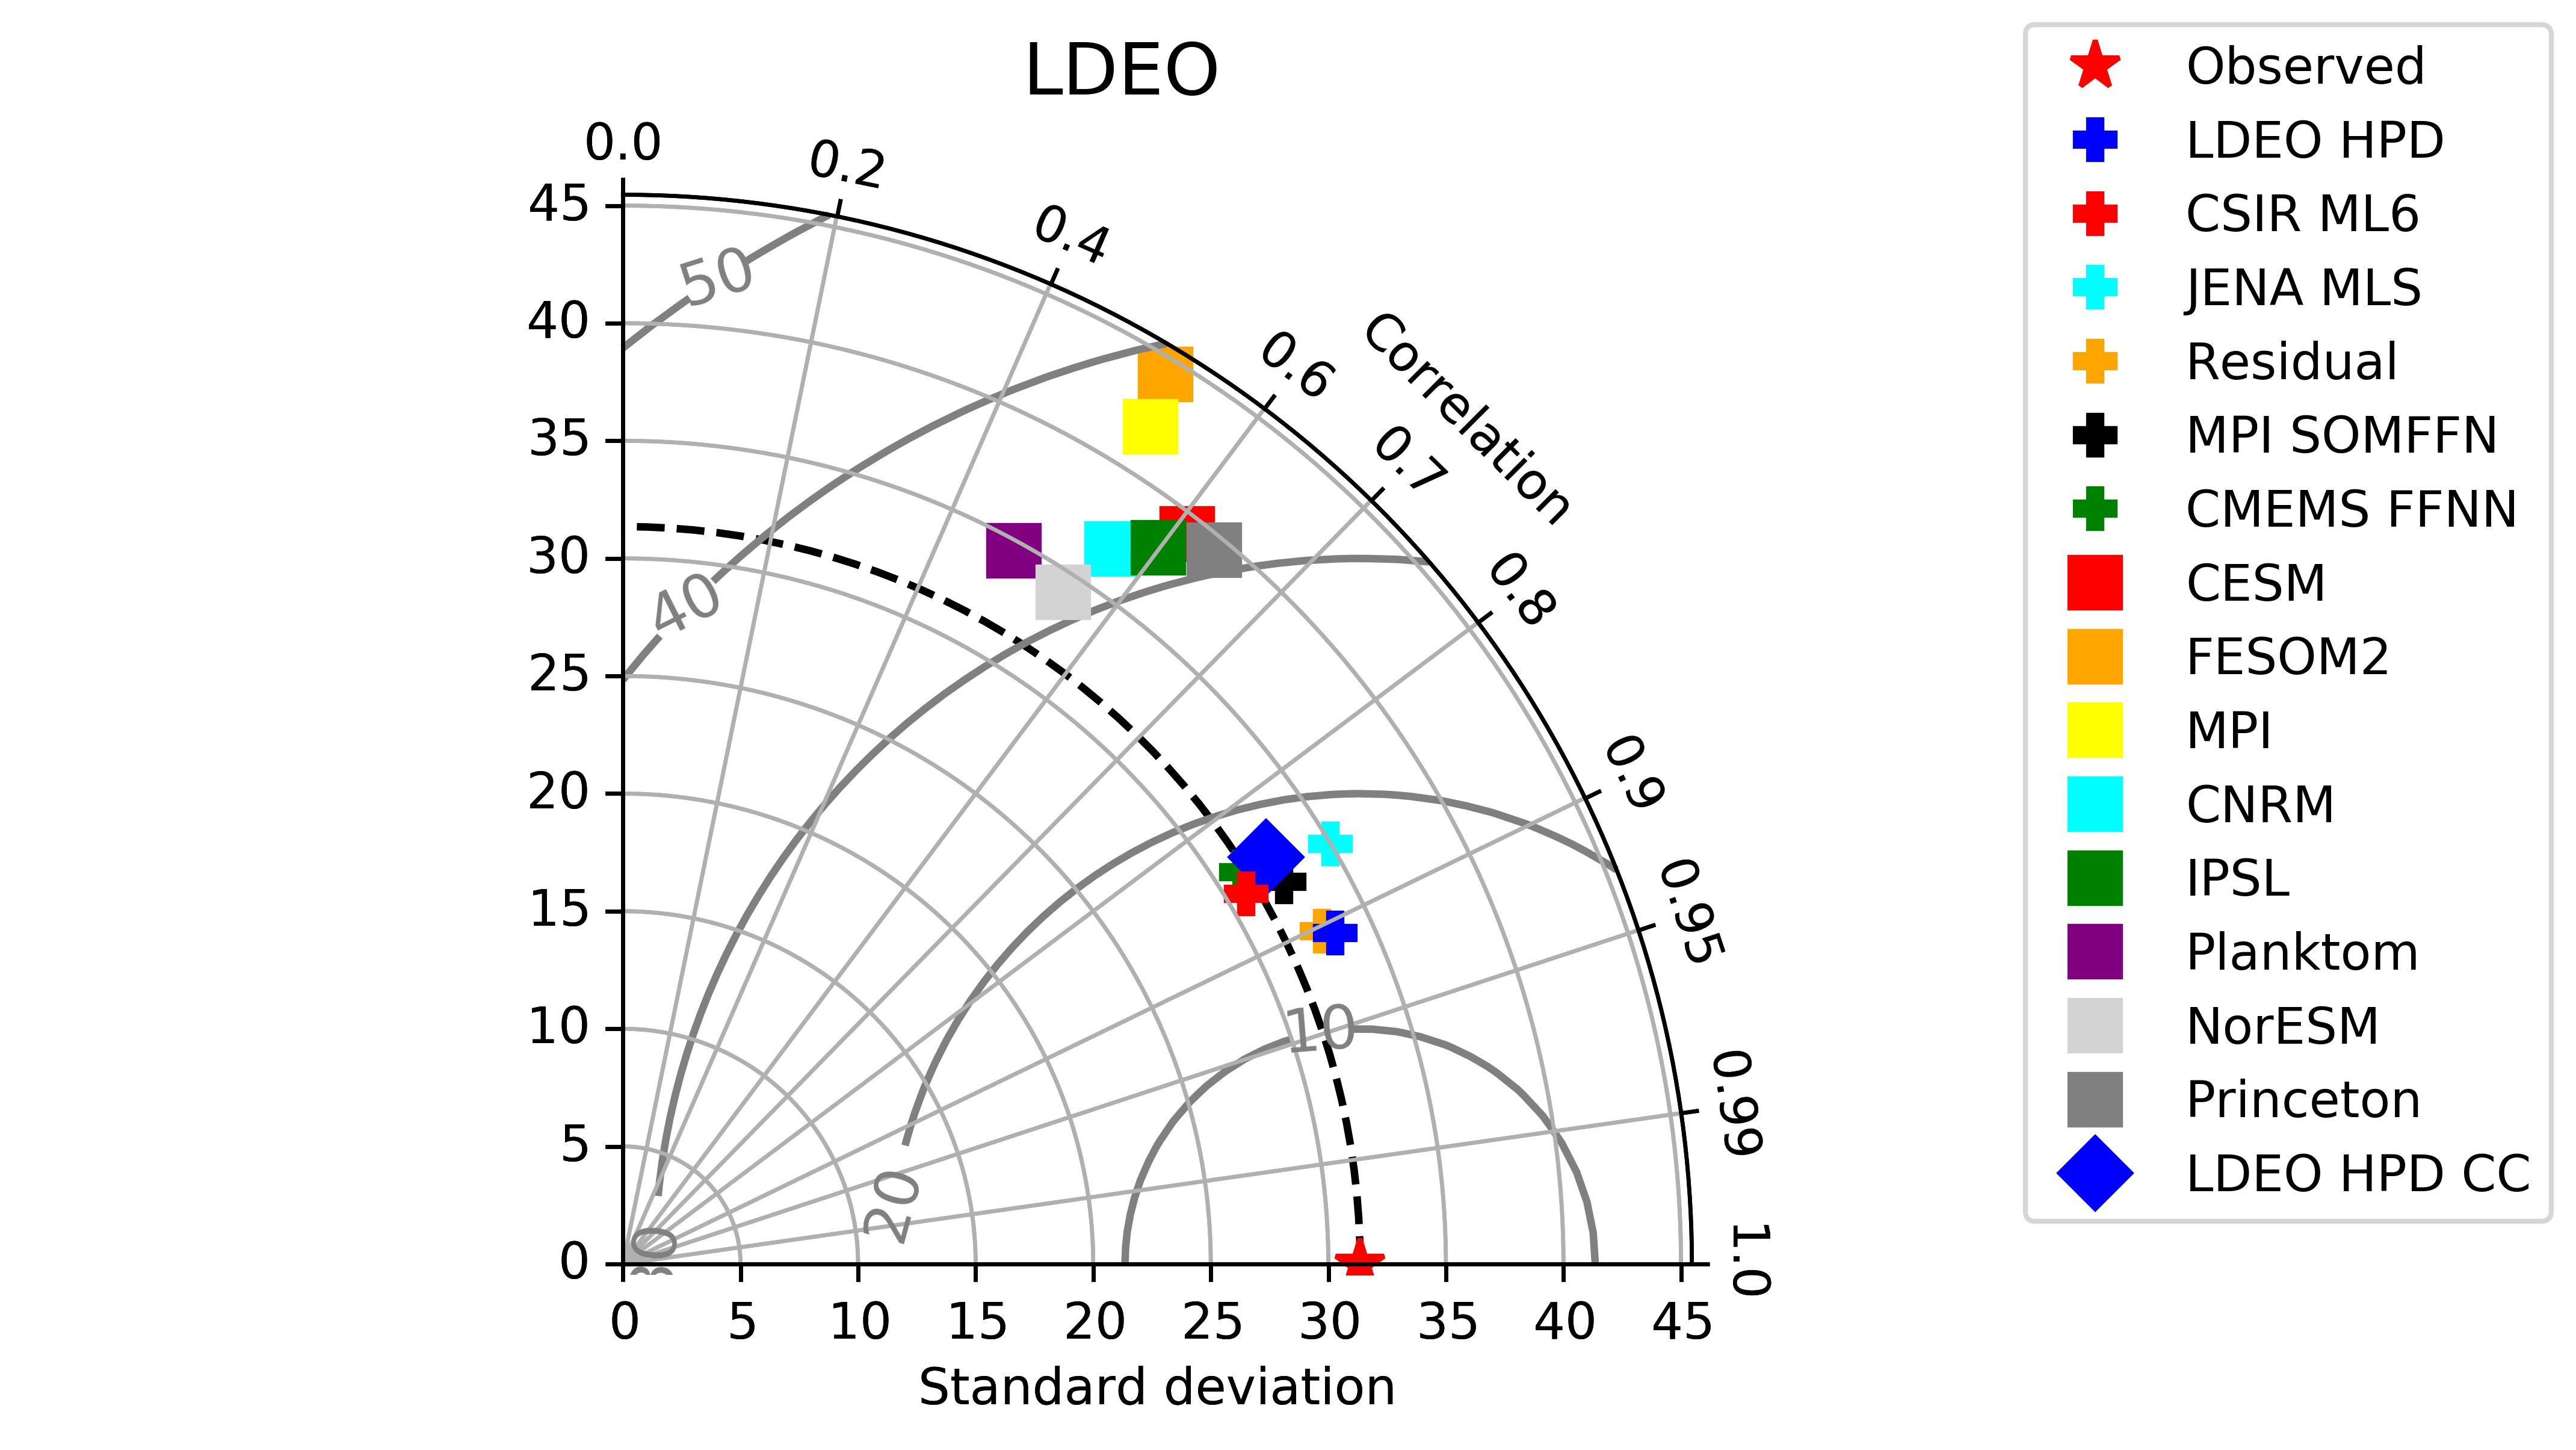

In [37]:
Taylor_locs_models_dproducts(4,'Taylor_LDEO_models_products.eps')

30.205709799640974


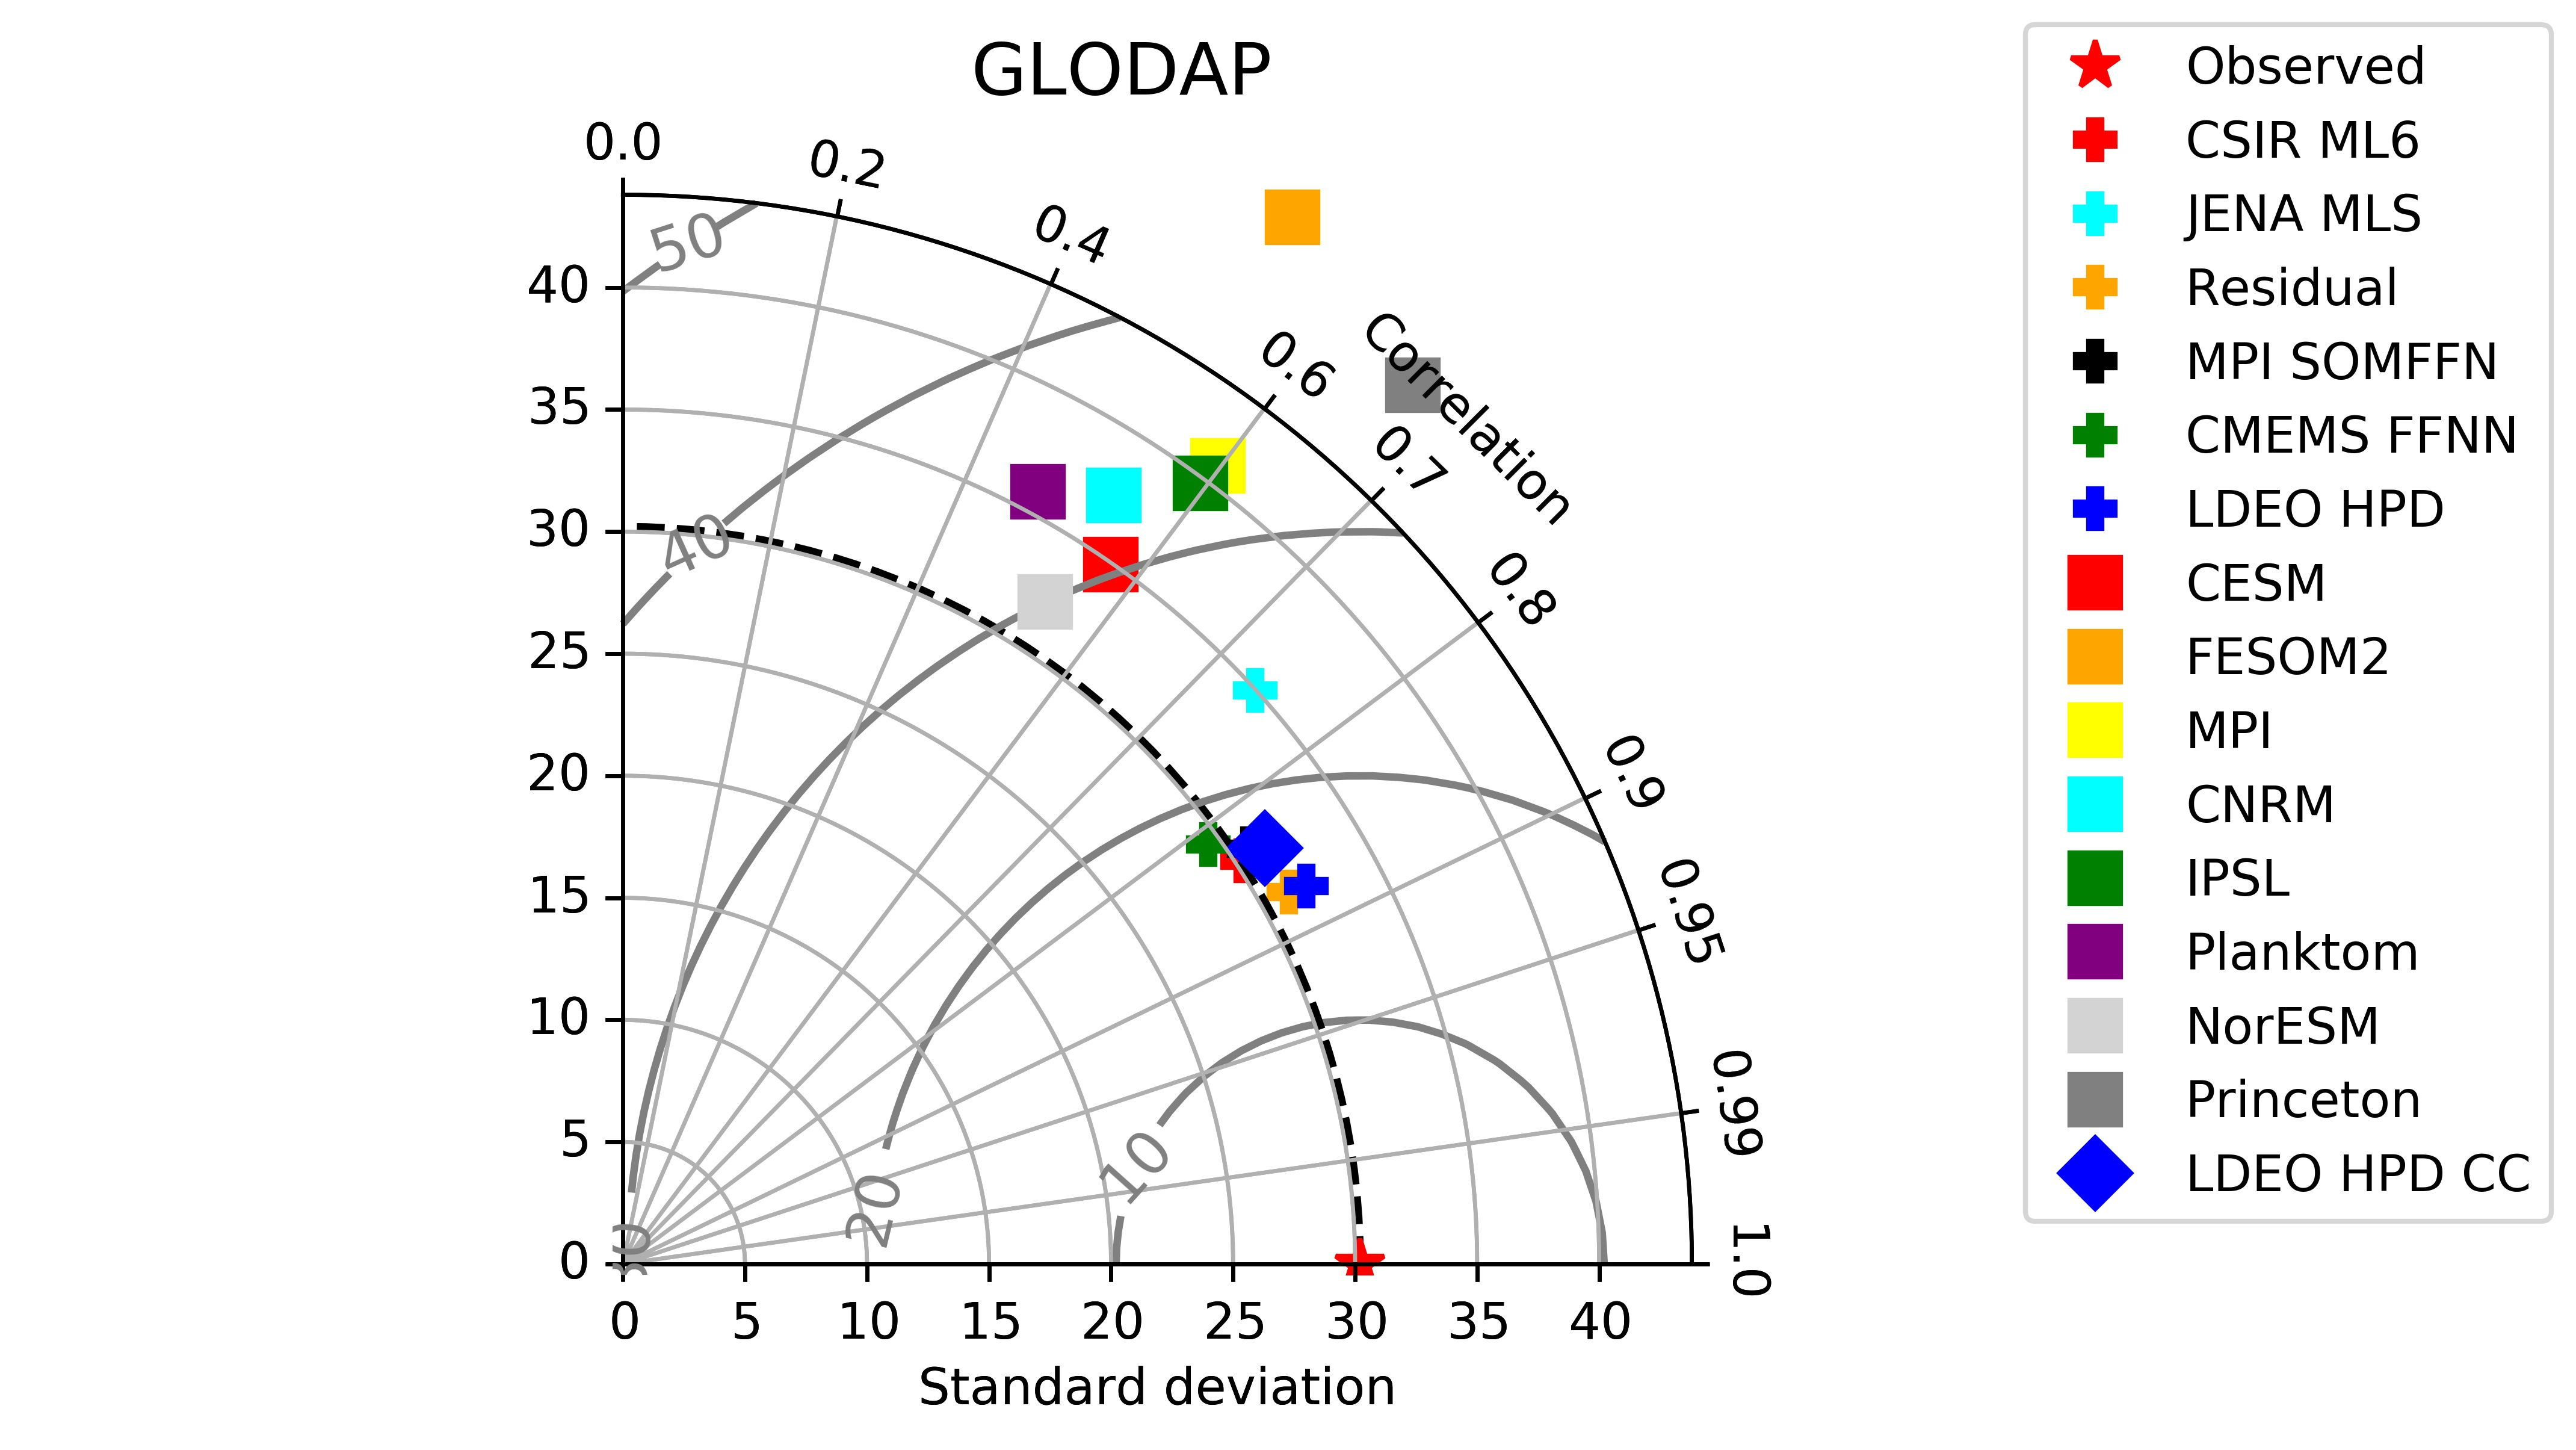

In [48]:
Taylor_locs_models_dproducts(5,'Taylor_GLODAP_models_products.eps')

In [45]:
def Taylor_locs_models_dproducts(location,figname=None):
    
    root_dir = "/data/artemis/workspace/vbennington/LDEO_HPD/models/XGB/GCB_2021"  # directory output will be written to  
    recon_output_dir = f"{root_dir}/reconstructions" # reconstructions saved here
    run_dir = '/data/artemis/workspace/vbennington/SOCAT_ML/pCO2_DIC'
    approach = 'xg'
    tdir = f"{run_dir}/models/reconstructions/{approach}"
    
    dm = pd.read_csv(f'{recon_output_dir}/Taylor_stats_pCO2_allmodels_1985-2020.csv') # uncorrected model output stats
    dhpd = pd.read_csv(f'{recon_output_dir}/Taylor_stats_pCO2_ens_1985-2020.csv') # HPD and HPD-clim corrected for the three climatology periods
    dprd = pd.read_csv(f"{tdir}/ens_pCO2_Taylor_stats_1985-2018.csv") # Includes data products (including updated CarboScope) 
    
    # Corresponding Rows ######
    if location == 1:   # BATS
        rowstd = 1
        rowr = 0
        labelt= "BATS"
    if location == 2:   # HOT
        rowstd = 4
        rowr = 3
        labelt = "HOT"
    if location == 3:    #SOCCOM
        rowstd = 7
        rowr = 6
        labelt = "SOCCOM"
    if location == 4:    # LDEO
        rowstd = 10
        rowr = 9
        labelt = "LDEO"
    if location == 5:   # GLODAP
        rowstd = 13
        rowr = 12
        labelt = "GLODAP"
    
    # Reference std
    stdref = dhpd.iloc[rowstd,5] # grab correct row / column
    print(stdref)
    
    # Samples std,rho,name
    samples_model = [[dm.iloc[rowstd,1], dm.iloc[rowr,1], "CESM", "red"],
               #[dm.iloc[rowstd,2], dm.iloc[rowr,2], "CSIRO", "magenta"],
               [dm.iloc[rowstd,2], dm.iloc[rowr,2], "FESOM2", "orange"],
               [dm.iloc[rowstd,3], dm.iloc[rowr,3], "MPI", "yellow"],
               [dm.iloc[rowstd,4], dm.iloc[rowr,4], "CNRM", "cyan"],
               [dm.iloc[rowstd,5], dm.iloc[rowr,5], "IPSL", "green"],
               [dm.iloc[rowstd,6], dm.iloc[rowr,6], "Planktom", "purple"],
               [dm.iloc[rowstd,7], dm.iloc[rowr,7], "NorESM", "lightgray"],
               [dm.iloc[rowstd,8], dm.iloc[rowr,8], "Princeton", "grey"],
             ]
   
    samples_products = [         
               [dprd.iloc[rowstd,3], dprd.iloc[rowr,3], "CSIR ML6", "red"],
               [dprd.iloc[rowstd,10], dprd.iloc[rowr,10], "JENA MLS", "cyan"],
               [dprd.iloc[rowstd,1], dprd.iloc[rowr,1], "Residual", "orange"],
               [dprd.iloc[rowstd,6], dprd.iloc[rowr,6], "MPI SOMFFN", "black"],
               #[dprd.iloc[rowstd,7], dprd.iloc[rowr,7], "NIES_FNN", "magenta"],
               [dprd.iloc[rowstd,8], dprd.iloc[rowr,8], "CMEMS FFNN", "green"],
            [dhpd.iloc[rowstd,1], dhpd.iloc[rowr,1], "LDEO HPD", "blue"],
                       ]
        
    # Samples std,rho,name
    hpd_clim = [[dhpd.iloc[rowstd,3], dhpd.iloc[rowr,3], "LDEO HPD CC", "blue"]]
    

    fig = PLT.figure(figsize=(8,4))

    dia = TaylorDiagram(stdref, fig=fig, label='Observed', extend=False)
    dia.samplePoints[0].set_color('r')  # Mark reference point as a red star
    dia.add_grid()                                  # Add grid
    dia._ax.axis[:].major_ticks.set_tick_out(True)  # Put ticks outward
    
    # Add RMS contours, and label them
    contours = dia.add_contours(levels=5, colors='0.5')  # 5 levels in grey
    PLT.clabel(contours, inline=1, fontsize=12, fmt='%.0f')
    
     # Add data products models to Taylor diagram
    for i, (stddev, corrcoef, name, colors) in enumerate(samples_products):
        dia.add_sample(stddev, corrcoef,
                       #marker='$%d$' % (i+1), ms=10, ls='',
                       marker='P', ms=8, ls='',
                       mfc=colors, mec=colors, color=colors,
                       label=name)
    
    # Add models to Taylor diagram
    for i, (stddev, corrcoef, name, colors) in enumerate(samples_model):
        dia.add_sample(stddev, corrcoef,
                       #marker='$%d$' % (i+1), ms=10, ls='',
                       marker='s', ms=10, ls='',
                       mfc=colors, mec=colors, color=colors,
                       label=name)
        
   
                
    # Add HPD clim corrected to Taylor diagram
    for i, (stddev, corrcoef, name, colors) in enumerate(hpd_clim):
        dia.add_sample(stddev, corrcoef,
                       #marker='$%d$' % (i+1), ms=10, ls='',
                       marker='D', ms=10, ls='',
                       mfc=colors,mec=colors, color=colors,
                       label="LDEO HPD CC")            

    

    # Add a figure legend and title
    fig.legend(dia.samplePoints,
               [ p.get_label() for p in dia.samplePoints ],
               numpoints=1, prop=dict(size='medium'), loc='upper right')
    fig.suptitle(labelt, size='x-large')  # Figure title
    
    if figname != None:
        fig.savefig(f'{recon_output_dir}/{figname}',format='eps',dpi=600)
    PLT.show()
    
    return dia

In [14]:
def Taylor_bw_locs_models(start_yr,end_yr,location,figname=None):
    
    #df = pd.read_csv(f'/data/artemis/workspace/vbennington/LDEO_HPD/models/XGB/clim_corrected/2000_2018_clim/pCO2_Taylor_stats_models_products_{start_yr}-{end_yr}.csv')
    var_model = df.columns[1:10]
    var_clim = df.columns[10:19]
    
    if location == 1:   # BATS
        rowstd = 1
        rowr = 0
        labelt= "BATS"
    if location == 2:   # HOT
        rowstd = 4
        rowr = 3
        labelt = "HOT"
    if location == 3:    #SOCCOM
        rowstd = 7
        rowr = 6
        labelt = "SOCCOM"
    if location == 4:    # LDEO
        rowstd = 10
        rowr = 9
        labelt = "LDEO"
    if location == 5:   # GLODAP
        rowstd = 13
        rowr = 12
        labelt = "GLODAP"
    
    # Reference std
    stdref = df.iloc[rowstd,30] # grab correct row / column
    print(stdref)
    
    # Samples std,rho,name
    samples_model = [[df.iloc[rowstd,1], df.iloc[rowr,1], "CESM", "red"],
               [df.iloc[rowstd,2], df.iloc[rowr,2], "CSIRO", "magenta"],
               [df.iloc[rowstd,3], df.iloc[rowr,3], "FESOM", "orange"],
               [df.iloc[rowstd,4], df.iloc[rowr,4], "MPI", "yellow"],
               [df.iloc[rowstd,5], df.iloc[rowr,5], "CNRM", "cyan"],
               [df.iloc[rowstd,6], df.iloc[rowr,6], "IPSL", "green"],
               [df.iloc[rowstd,7], df.iloc[rowr,7], "Planktom", "blue"],
               [df.iloc[rowstd,8], df.iloc[rowr,8], "NorESM", "purple"],
               [df.iloc[rowstd,9], df.iloc[rowr,9], "Princeton", "grey"],
             ]
    
    # Samples std,rho,name
    samples_clim = [[df.iloc[rowstd,10], df.iloc[rowr,10], "CESM-corr", "red"],
               [df.iloc[rowstd,11], df.iloc[rowr,11], "CSIRO-corr", "magenta"],
               [df.iloc[rowstd,12], df.iloc[rowr,12], "FESOM-corr", "orange"],
               [df.iloc[rowstd,13], df.iloc[rowr,13], "MPI-corr", "yellow"],
               [df.iloc[rowstd,14], df.iloc[rowr,14], "CNRM-corr", "cyan"],
               [df.iloc[rowstd,15], df.iloc[rowr,15], "IPSL-corr", "green"],
               [df.iloc[rowstd,16], df.iloc[rowr,16], "Planktom-corr", "blue"],
               [df.iloc[rowstd,17], df.iloc[rowr,17], "NorESM-corr", "purple"],
               [df.iloc[rowstd,18], df.iloc[rowr,18], "Princeton-corr", "grey"],
             ]
    
    # Samples std,rho,name
    hpd_clim = [[df.iloc[rowstd,28], df.iloc[rowr,28], "HPD-corr", "black"]]
    

    fig = PLT.figure(figsize=(8,4))

    dia = TaylorDiagram(stdref, fig=fig, label='Observed', extend=False)
    dia.samplePoints[0].set_color('r')  # Mark reference point as a red star

    # Add models to Taylor diagram
    for i, (stddev, corrcoef, name, colors) in enumerate(samples_model):
        dia.add_sample(stddev, corrcoef,
                       #marker='$%d$' % (i+1), ms=10, ls='',
                       marker='o', ms=12, ls='',
                       mfc='black', mec='black', color='black',
                       label=name)
        
    # Add clim corrected models to Taylor diagram
    for i, (stddev, corrcoef, name, colors) in enumerate(samples_clim):
        dia.add_sample(stddev, corrcoef,
                       #marker='$%d$' % (i+1), ms=10, ls='',
                       marker='^', ms=12, ls='',
                       mfc='black', mec='black', color='black',
                       label=name)
                
    # Add HPD clim corrected to Taylor diagram
    #for i, (stddev, corrcoef, name, colors) in enumerate(hpd_clim):
    #    dia.add_sample(stddev, corrcoef,
    #                   #marker='$%d$' % (i+1), ms=10, ls='',
    #                   marker='^', ms=14, ls='',
    #                   mfc='red', mec='red', color='red',
    #                   label="HPD-clim")            

    # Add RMS contours, and label them
    contours = dia.add_contours(levels=5, colors='0.5')  # 5 levels in grey
    PLT.clabel(contours, inline=1, fontsize=12, fmt='%.0f')

    dia.add_grid()                                  # Add grid
    dia._ax.axis[:].major_ticks.set_tick_out(True)  # Put ticks outward

    # Add a figure legend and title
    #fig.legend(dia.samplePoints,
    #           [ p.get_label() for p in dia.samplePoints ],
    #           numpoints=1, prop=dict(size='medium'), loc='upper right')
    fig.suptitle(labelt, size='x-large')  # Figure title
    
    if figname != None:
        fig.savefig(f'/data/artemis/workspace/vbennington/LDEO_HPD/models/XGB/clim_corrected/2000_2018_clim/{figname}')
    PLT.show()
    
    return dia

In [15]:
def Taylor_locs(start_yr,end_yr,location,figname=None):
    
    df = pd.read_csv(f'/data/artemis/workspace/vbennington/LDEO_HPD/models/XGB/clim_corrected/2000_2018_clim/pCO2_Taylor_stats_models_products_{start_yr}-{end_yr}.csv')
    variables = ['HPD','CSIR_ML6','JENA_MLS','JMA_MLR','MPI_SOMFFN','NIES_FNN','CMEMS_FFNN']
    
    if location == 1:   # BATS
        rowstd = 1
        rowr = 0
        labelt= "BATS"
    if location == 2:   # HOT
        rowstd = 4
        rowr = 3
        labelt = "HOT"
    if location == 3:    #SOCCOM
        rowstd = 7
        rowr = 6
        labelt = "SOCCOM"
    if location == 4:    # LDEO
        rowstd = 10
        rowr = 9
        labelt = "LDEO"
    if location == 5:   # GLODAP
        rowstd = 13
        rowr = 12
        labelt = "GLODAP"
    
    # Reference std
    stdref = df.iloc[rowstd,30] # grab correct row / column
    print(stdref)
    
    # Samples std,rho,name
    samples = [[df.iloc[rowstd,28], df.iloc[rowr,28], "HPD-Clim", "blue"],
               [df.iloc[rowstd,30], df.iloc[rowr,30], "CSIR_ML6", "red"],
               [df.iloc[rowstd,31], df.iloc[rowr,31], "JENA_MLS", "cyan"],
               [df.iloc[rowstd,32], df.iloc[rowr,32], "JMA_MLR", "yellow"],
               [df.iloc[rowstd,33], df.iloc[rowr,33], "MPI_SOMFFN", "black"],
               [df.iloc[rowstd,34], df.iloc[rowr,34], "NIES_FNN", "magenta"],
               [df.iloc[rowstd,35], df.iloc[rowr,35], "CMEMS_FFNN", "green"],
              ]
    

    fig = PLT.figure(figsize=(5,5))

    dia = TaylorDiagram(stdref, fig=fig, label='Observed', extend=False)
    dia.samplePoints[0].set_color('r')  # Mark reference point as a red star

    # Add models to Taylor diagram
    for i, (stddev, corrcoef, name, colors) in enumerate(samples):
        dia.add_sample(stddev, corrcoef,
                       #marker='$%d$' % (i+1), ms=10, ls='',
                       marker='o', ms=10, ls='',
                       mfc=colors, mec=colors, color=colors,
                       label=name)

    # Add RMS contours, and label them
    contours = dia.add_contours(levels=5, colors='0.5')  # 5 levels in grey
    PLT.clabel(contours, inline=1, fontsize=12, fmt='%.0f')

    dia.add_grid()                                  # Add grid
    dia._ax.axis[:].major_ticks.set_tick_out(True)  # Put ticks outward

    # Add a figure legend and title
    fig.legend(dia.samplePoints,
               [ p.get_label() for p in dia.samplePoints ],
               numpoints=1, prop=dict(size='medium'), loc='upper right')
    fig.suptitle(labelt, size='x-large')  # Figure title
    
    if figname!=None:
        fig.savefig(f'/data/artemis/workspace/vbennington/LDEO_HPD/models/XGB/clim_corrected/2000_2018_clim/{figname}')
    PLT.show()
    
    return dia

In [16]:
class TaylorDiagram(object):
    """
    Taylor diagram.
    Plot model standard deviation and correlation to reference (data)
    sample in a single-quadrant polar plot, with r=stddev and
    theta=arccos(correlation).
    """

    def __init__(self, refstd,
                 fig=None, rect=111, label='_', srange=(0, 1.45), extend=False):
        """
        Set up Taylor diagram axes, i.e. single quadrant polar
        plot, using `mpl_toolkits.axisartist.floating_axes`.
        Parameters:
        * refstd: reference standard deviation to be compared to
        * fig: input Figure or None
        * rect: subplot definition
        * label: reference label
        * srange: stddev axis extension, in units of *refstd*
        * extend: extend diagram to negative correlations
        """

        from matplotlib.projections import PolarAxes
        import mpl_toolkits.axisartist.floating_axes as FA
        import mpl_toolkits.axisartist.grid_finder as GF

        self.refstd = refstd            # Reference standard deviation

        tr = PolarAxes.PolarTransform()

        # Correlation labels
        rlocs = NP.array([0, 0.2, 0.4, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1])
        if extend:
            # Diagram extended to negative correlations
            self.tmax = NP.pi
            rlocs = NP.concatenate((-rlocs[:0:-1], rlocs))
        else:
            # Diagram limited to positive correlations
            self.tmax = NP.pi/2
        tlocs = NP.arccos(rlocs)        # Conversion to polar angles
        gl1 = GF.FixedLocator(tlocs)    # Positions
        tf1 = GF.DictFormatter(dict(zip(tlocs, map(str, rlocs))))

        # Standard deviation axis extent (in units of reference stddev)
        self.smin = srange[0] * self.refstd
        self.smax = srange[1] * self.refstd

        ghelper = FA.GridHelperCurveLinear(
            tr,
            extremes=(0, self.tmax, self.smin, self.smax),
            grid_locator1=gl1, tick_formatter1=tf1)

        if fig is None:
            fig = PLT.figure()

        ax = FA.FloatingSubplot(fig, rect, grid_helper=ghelper)
        fig.add_subplot(ax)

        # Adjust axes
        ax.axis["top"].set_axis_direction("bottom")   # "Angle axis"
        ax.axis["top"].toggle(ticklabels=True, label=True)
        ax.axis["top"].major_ticklabels.set_axis_direction("top")
        ax.axis["top"].label.set_axis_direction("top")
        ax.axis["top"].label.set_text("Correlation")

        ax.axis["left"].set_axis_direction("bottom")  # "X axis"
        ax.axis["left"].label.set_text("Standard deviation")

        ax.axis["right"].set_axis_direction("top")    # "Y-axis"
        ax.axis["right"].toggle(ticklabels=True)
        ax.axis["right"].major_ticklabels.set_axis_direction(
            "bottom" if extend else "left")

        if self.smin:
            ax.axis["bottom"].toggle(ticklabels=False, label=False)
        else:
            ax.axis["bottom"].set_visible(False)          # Unused

        self._ax = ax                   # Graphical axes
        self.ax = ax.get_aux_axes(tr)   # Polar coordinates

        # Add reference point and stddev contour
        l, = self.ax.plot([0], self.refstd, 'k*',
                          ls='', ms=10, label=label)
        t = NP.linspace(0, self.tmax)
        r = NP.zeros_like(t) + self.refstd
        self.ax.plot(t, r, 'k--', label='_')

        # Collect sample points for latter use (e.g. legend)
        self.samplePoints = [l]
        
        
    def add_sample(self, stddev, corrcoef, *args, **kwargs):
        """
        Add sample (*stddev*, *corrcoeff*) to the Taylor
        diagram. *args* and *kwargs* are directly propagated to the
        `Figure.plot` command.
        """

        l, = self.ax.plot(NP.arccos(corrcoef), stddev,
                          *args, **kwargs)  # (theta, radius)
        self.samplePoints.append(l)

        return l
        
    def add_grid(self, *args, **kwargs):
        """Add a grid."""
        self._ax.grid(*args, **kwargs)

    def add_contours(self, levels=5, **kwargs):
        """
        Add constant centered RMS difference contours, defined by *levels*.
        """

        rs, ts = NP.meshgrid(NP.linspace(self.smin, self.smax),
                             NP.linspace(0, self.tmax))
        # Compute centered RMS difference
        rms = NP.sqrt(self.refstd**2 + rs**2 - 2*self.refstd*rs*NP.cos(ts))

        contours = self.ax.contour(ts, rs, rms, levels, **kwargs)

        return contours         